In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
df = pd.read_csv('../Advertising.csv')
X = df.drop('sales', axis=1)
y = df['sales']

- create different order poly
- split poly feat train/test
- fit model on train
- store the rmse for both train and test
- plot results

In [21]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [22]:
train_rmse_errors

[1.734594124329376,
 0.587957408529223,
 0.4339344356902067,
 0.3517083688399352,
 0.25093430240186493,
 0.1956956650944703,
 5.421767579927489,
 0.14717467854286936,
 0.17683910496695726]

In [23]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269089,
 0.5803286825242431,
 0.5077742639736941,
 2.5758252309086074,
 4.2581114486759,
 1378.983369259555,
 4123.5222440678335,
 95626.55900673773]

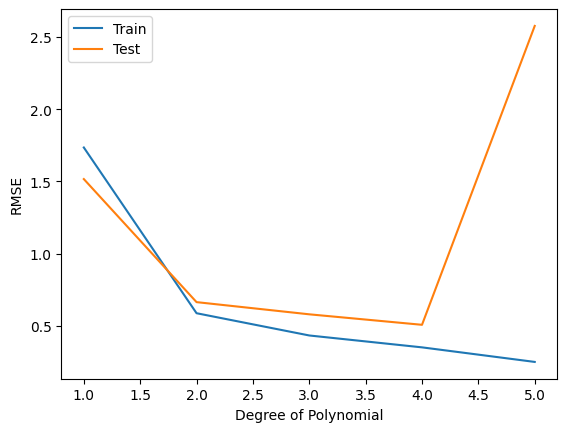

In [29]:
plt.plot(range(1, 6), train_rmse_errors[:5])
plt.plot(range(1, 6), test_rmse_errors[:5])

plt.ylabel('RMSE')
plt.xlabel('Degree of Polynomial')
plt.legend(['Train', 'Test'])

In [30]:
final_poly = PolynomialFeatures(degree=3, include_bias=False)

In [31]:
final_model = LinearRegression()

In [32]:
full_converted = final_poly.fit_transform(X)
final_model.fit(full_converted, y)

LinearRegression()

In [37]:
from joblib import dump,load

In [34]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [38]:
dump(final_poly, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [39]:
loaded_model = load('final_poly_model.joblib')

In [40]:
campaign = [[149, 22, 12]]

In [41]:
loaded_converter = load('final_poly_converter.joblib')

In [43]:
data = loaded_converter.fit_transform(campaign)

In [44]:
loaded_model.predict(data)

array([14.64501014])

**Previous model (simple linear regression)**
- 13.89